In [ ]:
## @see https://www.kaggle.com/toorkp/churn-wsdm/data

In [9]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of shared_functions failed: Traceback (most recent call last):
  File "/home/anaconda/envs/py373/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/anaconda/envs/py373/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/anaconda/envs/py373/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/anaconda/envs/py373/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/anaconda/envs/py373/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()
StopIteration
]


In [2]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *

In [3]:
base_dataset = pd.read_hdf('/home/dissertation/data/base_abt.h5', 'base_abt')

In [4]:
## Simple Data Prep 
base_dataset = OHE(base_dataset)
base_dataset = base_dataset.drop(labels =['gender','msno'], axis=1)

## Simply drops records with NA 
base_dataset = clean_dataset(base_dataset)

print(base_dataset.shape)
base_dataset.head()

Categorical columns in dataset ['city', 'registered_via']
(858935, 54)


,is_churn,bd,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,...,ohe_registered_via_4,ohe_registered_via_5,ohe_registered_via_6,ohe_registered_via_7,ohe_registered_via_8,ohe_registered_via_9,ohe_registered_via_1,ohe_registered_via_18,ohe_registered_via_10,ohe_registered_via_-1
0,1,28,20131223,2013-12-23,6,31.00,2.00,0.00,10.00,49.67,...,0,0,0,0,0,0,0,0,0,0
1,1,20,20131223,2013-12-23,5,38.00,3.00,30.00,25.40,125.40,...,0,0,0,0,0,0,0,0,0,0
2,1,18,20131227,2013-12-27,18,38.00,1.00,30.00,30.00,149.00,...,0,0,0,0,0,0,0,0,0,0
3,1,0,20140109,2014-01-09,19,41.00,2.00,30.00,25.63,125.47,...,0,0,0,1,0,0,0,0,0,0
4,1,35,20140125,2014-01-25,24,41.00,1.00,30.00,26.25,105.38,...,0,0,0,1,0,0,0,0,0,0


In [5]:
print("Churn rate: {0:.4f}".format(np.mean(base_dataset.is_churn)))
base_dataset.is_churn.value_counts()

Churn rate: 0.0935


0    778635
1     80300
Name: is_churn, dtype: int64

In [6]:
## Each entry in the list is a Tuple of
##   [ModelName, Model, HyperParams, ScoringMetric]
classifiers = [
    ('NB', GaussianNB(), {}, 'f1'),
    ('DT', DecisionTreeClassifier(), {}, 'f1'),
    ('RF', RandomForestClassifier(), {}, 'f1'),
    ('LR', LogisticRegression(solver = 'liblinear'), {}, 'f1'),
    ('AB', AdaBoostClassifier(), {}, 'f1'),
    #('MLP', MLPClassifier(), {}, 'f1')
]

### Experiment 1.1 Baseline - Default Settings - No sampling

Applying normalisation to train and test sets


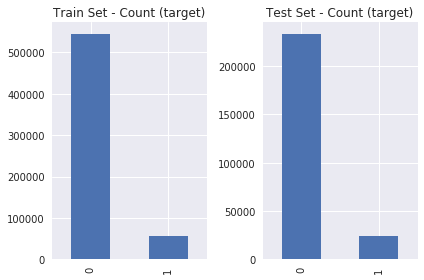

Applying normalisation to train and test sets
Building NB classifier
No params set, using Standard training
P_Recall: 0.43; N_Recall: 0.969
Building DT classifier
No params set, using Standard training
P_Recall: 0.473; N_Recall: 0.954
Building RF classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


P_Recall: 0.433; N_Recall: 0.982
Building LR classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


P_Recall: 0.0; N_Recall: 1.0
Building AB classifier
No params set, using Standard training
P_Recall: 0.356; N_Recall: 0.991


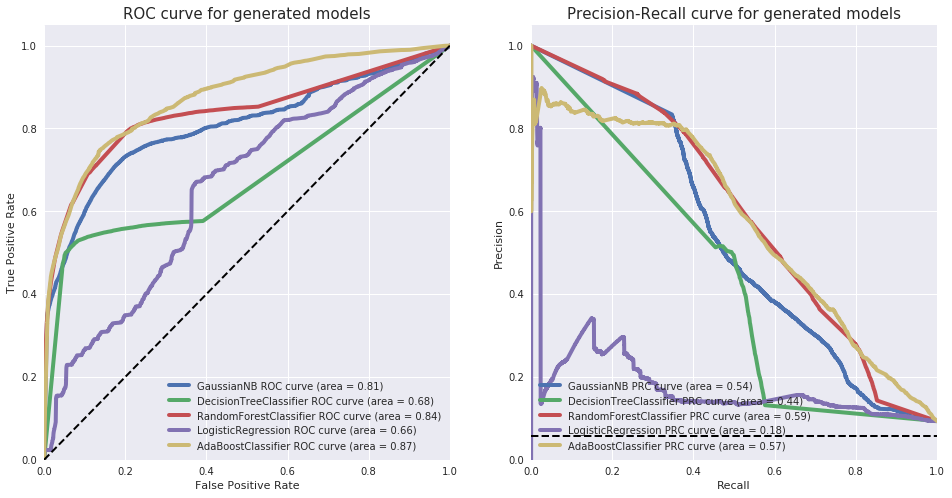

,classifier,sampling_method,sampling_ratio,accuracy,precision,recall,f1_score,log_loss,time_taken,aucroc,auprc,bal_acc
0,GaussianNB,None,None,0.92,0.59,0.43,0.50,2.80,3.58,0.81,0.54,0.70
0,DecisionTreeClassifier,None,None,0.91,0.52,0.47,0.49,3.14,9.64,0.68,0.44,0.71
0,RandomForestClassifier,None,None,0.93,0.72,0.43,0.54,2.38,18.01,0.84,0.59,0.71
0,LogisticRegression,None,None,0.91,0.00,0.00,0.00,3.23,4.95,0.66,0.18,0.50
0,AdaBoostClassifier,None,None,0.93,0.81,0.36,0.49,2.35,112.70,0.87,0.57,0.67


In [7]:
sampl_method = None
sampl_ratio = None

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split_v1(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model_v1(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = model_build_results[0]

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

### Experiment 1.2 Baseline - Default Settings - Oversampled training set 100%

Sample ratio:  1.0  ::  545044
Applying normalisation to train and test sets


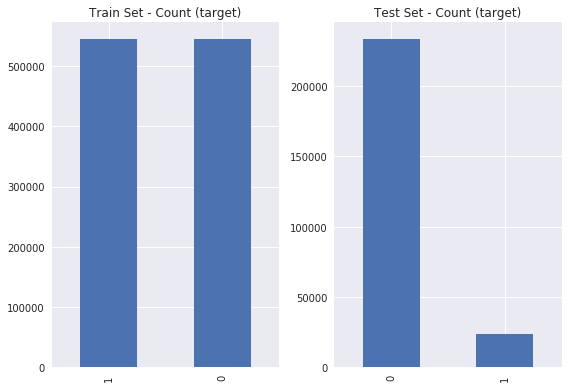

Sample ratio:  1.0  ::  545044
Applying normalisation to train and test sets
Building NB classifier
No params set, using Standard training
P_Recall: 0.469; N_Recall: 0.95
Building DT classifier
No params set, using Standard training
P_Recall: 0.512; N_Recall: 0.924
Building RF classifier
No params set, using Standard training
P_Recall: 0.528; N_Recall: 0.941
Building LR classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


P_Recall: 0.639; N_Recall: 0.797
Building AB classifier
No params set, using Standard training
P_Recall: 0.742; N_Recall: 0.871


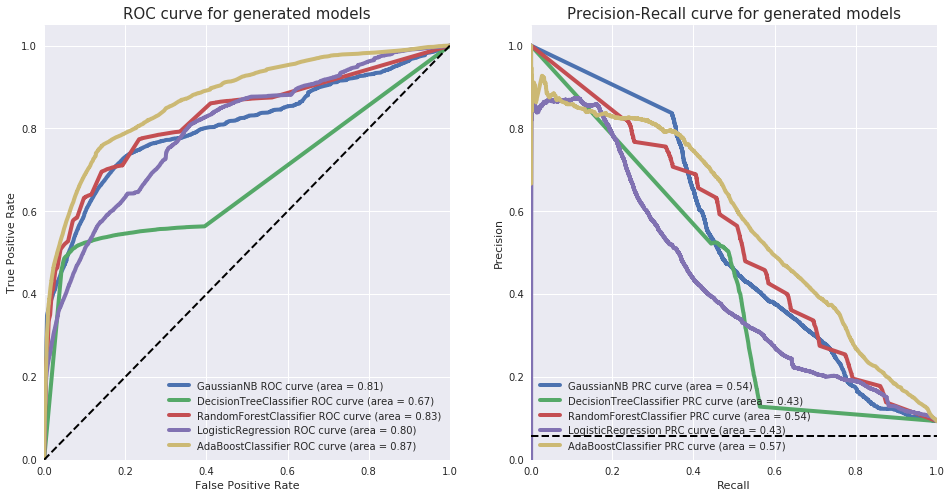

,classifier,sampling_method,sampling_ratio,accuracy,precision,recall,f1_score,log_loss,time_taken,aucroc,auprc,bal_acc
0,GaussianNB,None,nan,0.92,0.59,0.43,0.50,2.80,3.58,0.81,0.54,0.70
0,DecisionTreeClassifier,None,nan,0.91,0.52,0.47,0.49,3.14,9.64,0.68,0.44,0.71
0,RandomForestClassifier,None,nan,0.93,0.72,0.43,0.54,2.38,18.01,0.84,0.59,0.71
0,LogisticRegression,None,nan,0.91,0.00,0.00,0.00,3.23,4.95,0.66,0.18,0.50
0,AdaBoostClassifier,None,nan,0.93,0.81,0.36,0.49,2.35,112.70,0.87,0.57,0.67
0,GaussianNB,over,1.00,0.91,0.49,0.47,0.48,3.27,5.51,0.81,0.54,0.71
0,DecisionTreeClassifier,over,1.00,0.89,0.41,0.51,0.46,3.96,14.74,0.67,0.43,0.72
0,RandomForestClassifier,over,1.00,0.90,0.48,0.53,0.50,3.38,28.05,0.83,0.54,0.73
0,LogisticRegression,over,1.00,0.78,0.25,0.64,0.35,7.52,34.96,0.80,0.43,0.72
0,AdaBoostClassifier,over,1.00,0.86,0.37,0.74,0.50,4.88,202.93,0.87,0.57,0.81


In [11]:
sampl_method = 'over'
sampl_ratio = 1.0

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split_v1(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model_v1(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = pd.concat([metrics, model_build_results[0]])
metrics.sort_values(['auprc'], ascending=[False])

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

### Experiment 1.3 Baseline - Default Settings - Undersampled training set

In [ ]:
sampl_method = 'under'
sampl_ratio = None

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = pd.concat([metrics, model_build_results[0]])
metrics.sort_values(['auprc'], ascending=[False])

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

### Experiment 1.4 Baseline - Default Settings - Over sampling - 33% of majority size

In [ ]:
sampl_method = 'over'
sampl_ratio = 0.33

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = pd.concat([metrics, model_build_results[0]])
metrics.sort_values(['auprc'], ascending=[False])

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

### Experiment 1.5 Baseline - Default Settings - Over sampling - 66% of majority size

In [ ]:
sampl_method = 'over'
sampl_ratio = 0.66

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = pd.concat([metrics, model_build_results[0]])
metrics.sort_values(['auprc'], ascending=[False])

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

### Experiment 1.6 Baseline - Default Settings - Over sampling - 50% of majority size

In [8]:
sampl_method = 'over'
sampl_ratio = 0.5

## sampling can be one of [None, 'under', 'over']
X_train, X_test, y_train, y_test = prepare_train_test_split(base_dataset, 0, sampl_method, sampl_ratio)

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Train Set - Count (target)')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Test Set - Count (target)')

plt.tight_layout()
plt.show()

model_build_results = train_model(base_dataset, 
                                  sampling_method = sampl_method, sample_ratio = sampl_ratio, 
                                  classifiers = classifiers)

metrics = pd.concat([metrics, model_build_results[0]])
metrics.sort_values(['auprc'], ascending=[False])

plot_data = []
for res in model_build_results[1]:
    model_name, model, (fpr, tpr, roc_auc), (precision, recall, prc_auc) = res
    plot_data.append((model_name, tpr, fpr, roc_auc, precision, recall, prc_auc))   
    
plot_roc_prc(plot_data)

metrics

PRE-SAMPLING: (429467, 53) (429467,) Counter({0: 389317, 1: 40150})


AttributeError: 'str' object has no attribute 'fit_resample'

In [ ]:
metrics.sort_values('aucroc', ascending=False).head(15)

In [ ]:
## Just try an SVM 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time
model_train_results = train_model(base_dataset, sampling_method = 'under', classifiers = [('SGDClassifier', SGDClassifier(loss='log'))])

In [ ]:
## Print the feature importance 

feature_index = np.flip(np.argsort(model.feature_importances_), axis=0)
ordered_features = []
column_names = X_test.columns

for i in feature_index[0:10]:
    print(np.round(model.feature_importances_[i], 3), ' --> ', column_names[i])
    ordered_features.append(column_names[i])

In [ ]:
## Print the permutation importance 

import eli5
from eli5.sklearn import PermutationImportance

_, X_test, _, y_test = prepare_train_test_split(model_dataset, 0)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#model_name, model = model_train_results[1][2]

for model_name, model in model_train_results[1]:
    probs = model.predict_proba(X_test)[:, 1]
    pr_data = plot_precision_recall(
        y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
pr_data = plot_roc(
    y_test, probs, title='ROC Curve for {0}'.format(model_name))

In [ ]:
print(plt.style.available)

In [ ]:
model_dataset.head()

In [ ]:
print("Original Data distribution")
print(model_dataset['is_churn'].value_counts())

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
train_downsample = undersampled_dataset(model_dataset, 'is_churn')

print(train_downsample['is_churn'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Up Sampled data set')
train_upsample = oversampled_dataset(model_dataset, 'is_churn')

print(train_upsample['is_churn'].value_counts())
print("Num records = ", train_upsample.shape[0])
train_upsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

In [ ]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.25].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

In [ ]:
threshold_required = 0.5
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [ ]:
model_dataset.head()

In [ ]:
fi = pd.DataFrame({'importance': model.feature_importances_}, index=model_dataset.iloc[:, 1:].columns).\
    sort_values('importance', ascending=False)
fi.head(10)